# **Preprocessing**

In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
import plotly.express as px
import pandas as pd

In [30]:
df = pd.read_csv(r"C:\Users\USER\Desktop\jupyter\housing_data.csv")

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [32]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [34]:
print(df['condition'].unique())

[3 5 4 2 1]


In [35]:
# Checking for Null Values
nullvalues = df.isna().sum().sum()
print('Total null values in the dataset :', nullvalues)

Total null values in the dataset : 0


In [36]:
# Checking for duplicates
duplicates = df.duplicated()
duplicates = duplicates.unique()

if len(duplicates) == 1:
    print('There are no Duplicates in this Dataset')
else:
    print('There are Duplicates in the Dataset')

There are no Duplicates in this Dataset


In [37]:
#Removing outliers where price is greater than 10M
df = df[df['price'] <= 10000000]
df = df[df['sqft_lot'] <= 50000]

# **Visualization**

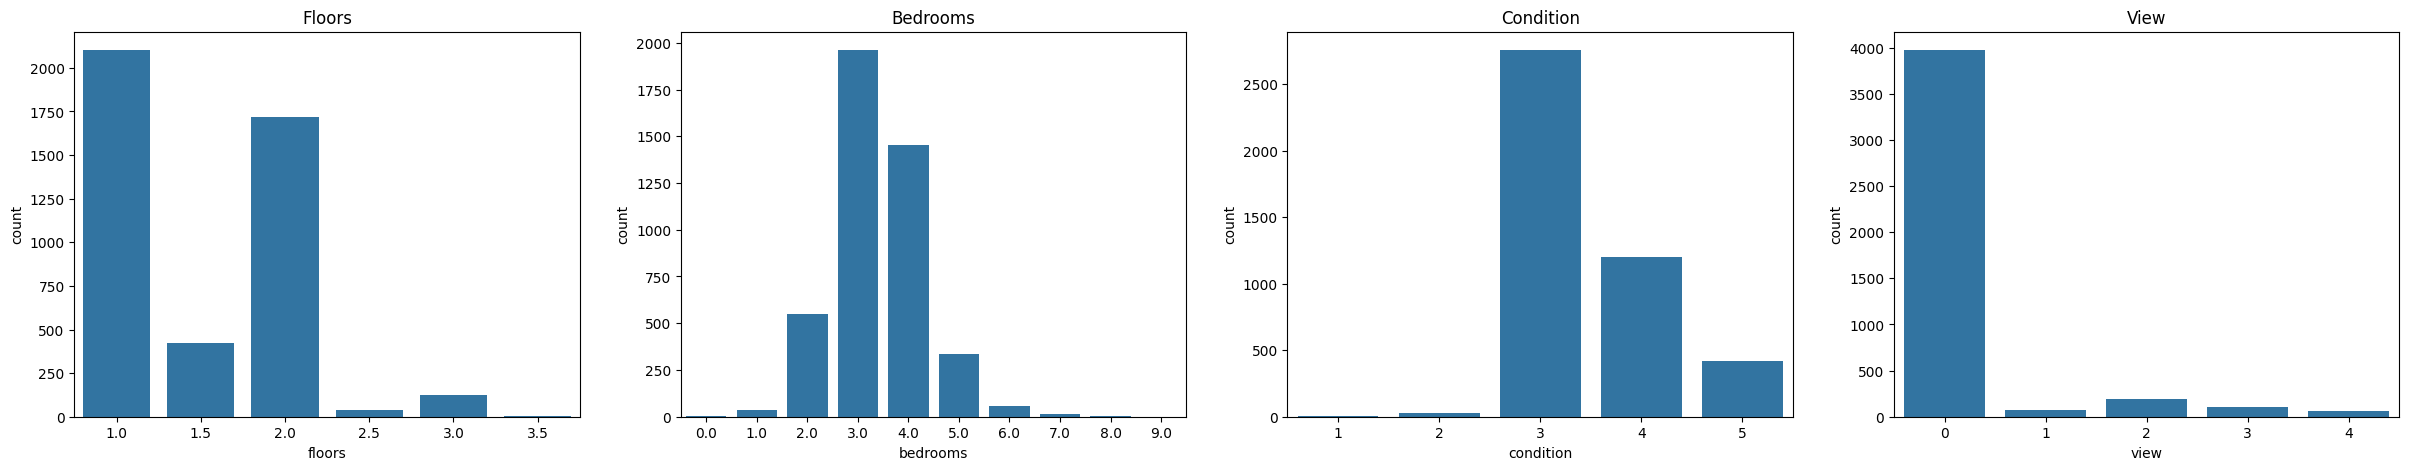

In [38]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,5))

# First count plot
sns.countplot(x='floors', data=df, ax=axes[0])  # Replace 'column1'
axes[0].set_title('Floors')

# Second count plot
sns.countplot(x='bedrooms', data=df, ax=axes[1])  # Replace 'column2'
axes[1].set_title('Bedrooms')

# Third count plot
sns.countplot(x='condition', data=df, ax=axes[2])
axes[2].set_title('Condition')

#Fourth count plot
sns.countplot(x='view', data=df, ax=axes[3])
axes[3].set_title('View')

# Display the plot
plt.show()

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


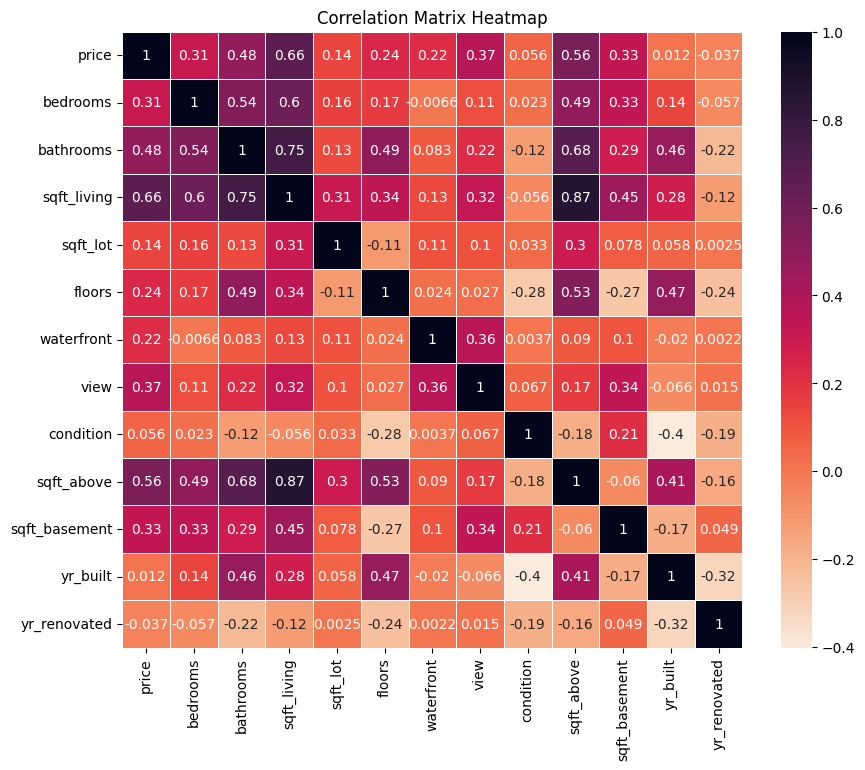

In [39]:
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_columns)

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

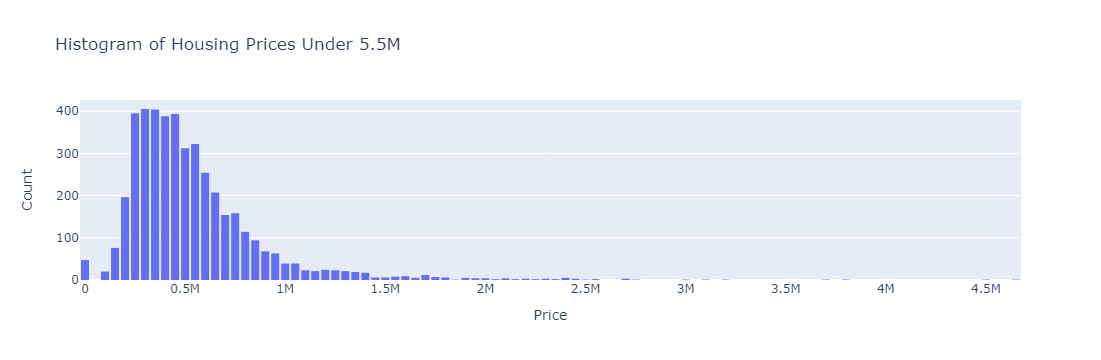

In [40]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and 'price' is the column of interest
# Filter the DataFrame for prices under 5,500,000
prices_under_5M = df[df['price'] < 5500000]['price']

# Create the histogram with the filtered data
fig = go.Figure(data=[go.Histogram(x=prices_under_5M)])

# Customize the layout
fig.update_layout(
    title='Histogram of Housing Prices Under 5.5M',
    xaxis_title='Price',
    yaxis_title='Count',
    bargap=0.2
)

# Display the histogram
fig.show()

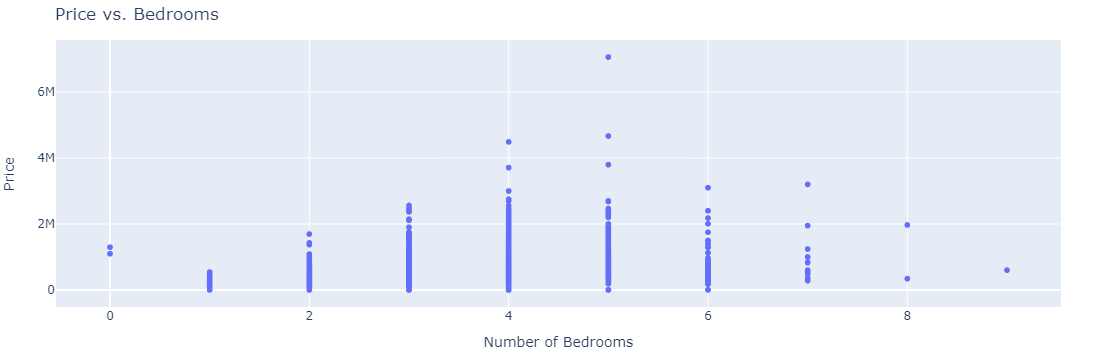

In [41]:
# Assuming 'df' is your DataFrame and it contains 'price' and 'bedrooms' columns
fig = px.scatter(df, x='bedrooms', y='price', title='Price vs. Bedrooms',
                 labels={'bedrooms': 'Number of Bedrooms', 'price': 'Price'})

fig.update_layout(
    xaxis=dict(title='Number of Bedrooms'),
    yaxis=dict(title='Price'),
    margin=dict(l=40, r=40, b=40, t=40)
)

# Display the scatterplot
fig.show()

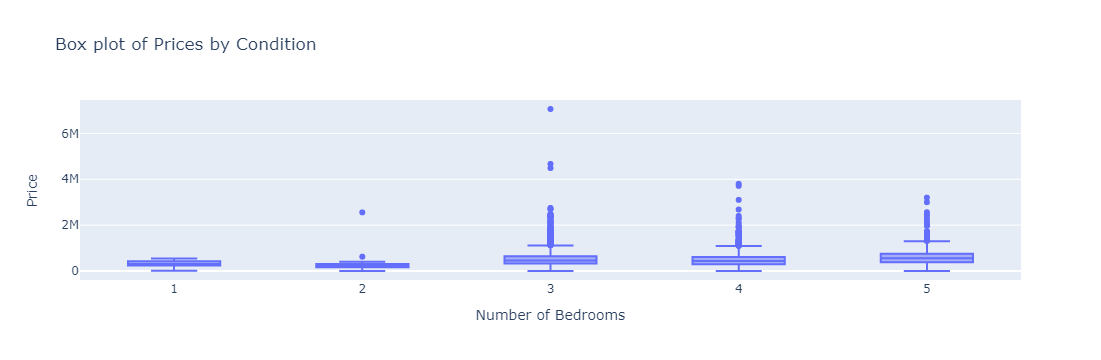

In [42]:
fig = px.box(df, x='condition', y='price', title='Box plot of Prices by Condition')
fig.update_layout(xaxis_title='Number of Bedrooms', yaxis_title='Price')
fig.show()

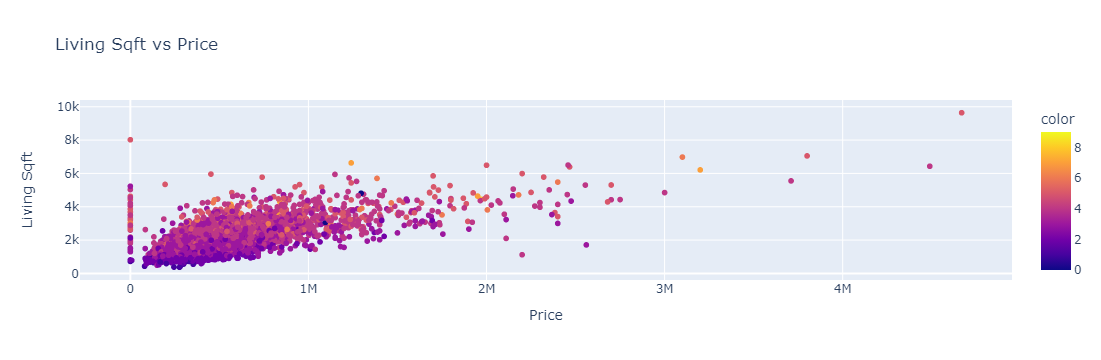

In [43]:
df_sqft = df[df['price']<5000000]
fig = px.scatter(x = df_sqft['price'], y= df_sqft['sqft_living'], title='Living Sqft vs Price', color= df_sqft['bedrooms'])

fig.update_layout(
    xaxis=dict(title='Price'),
    yaxis=dict(title='Living Sqft'),
    #margin=dict(l=40, r=40, b=40, t=40)
)

# Display the scatterplot
fig.show()

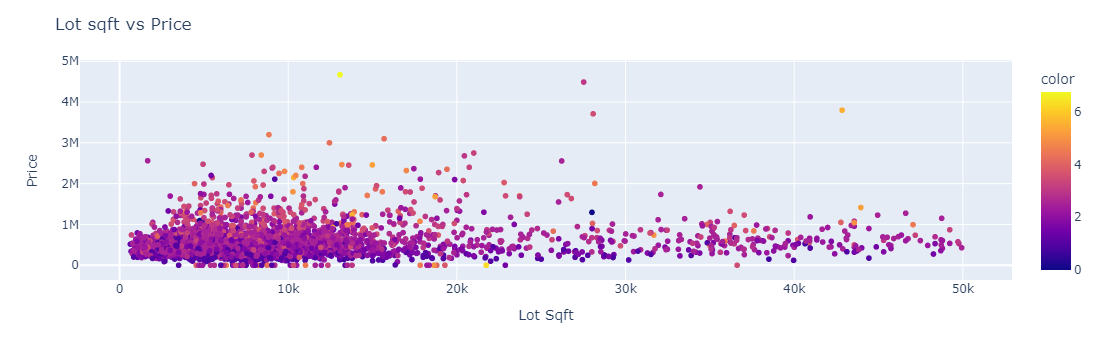

In [44]:
df_sqft = df[df['price']<5000000]
fig = px.scatter(x=df_sqft['sqft_lot'], y=df_sqft['price'], color=df_sqft['bathrooms'])
fig.update_layout(
    xaxis= dict(title='Lot Sqft'),
    yaxis= dict(title='Price'),
    #color=dict(title='Bathrooms'),
    title= 'Lot sqft vs Price'
)

fig.show()

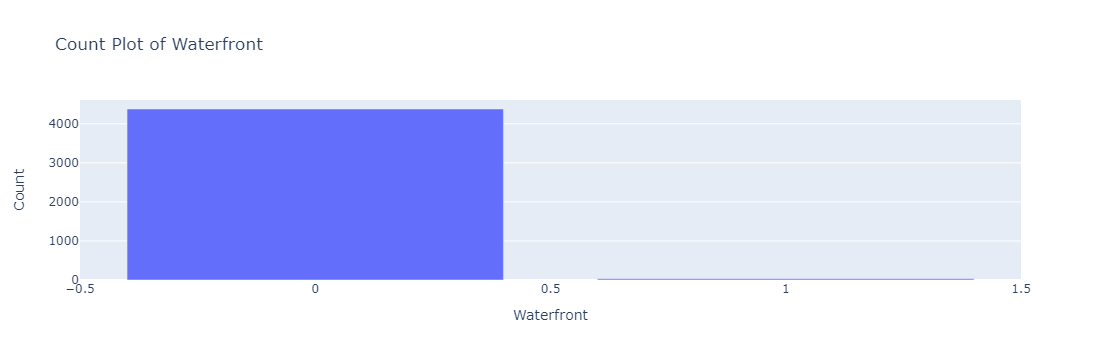

In [45]:
# Calculate counts for each category in 'waterfront'
waterfront_counts = df_sqft['waterfront'].value_counts().reset_index()
waterfront_counts.columns = ['waterfront', 'count']

# Create the bar plot
fig = px.bar(waterfront_counts, x='waterfront', y='count',
             title='Count Plot of Waterfront')
fig.update_layout(
    xaxis_title='Waterfront',
    yaxis_title='Count'
)
fig.show()


# **Training the Model**

In [46]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [47]:
df.drop(columns=["country", "statezip","street",'date','city'], inplace=True)

In [48]:
#Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [49]:
df1 = df
# Assuming df is your DataFrame
X = df1.drop('price', axis=1)  # Replace 'target_column' with the name of your target column
y = df1['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [50]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [51]:
# Initialize the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

# **Evaluation Metrics**

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions using the Linear Regression model
y_pred_lr_scaled = linear_model.predict(X_test_scaled)
y_train_pred_lr_scaled = linear_model.predict(X_train_scaled)

# Inverse transform the predictions to original scale
y_pred_lr = sc_y.inverse_transform(y_pred_lr_scaled.reshape(-1, 1)).flatten()
y_train_pred_lr = sc_y.inverse_transform(y_train_pred_lr_scaled.reshape(-1, 1)).flatten()

# Calculate R2 score for Linear Regression
r2_lr_train = r2_score(y_train, y_train_pred_lr)
r2_lr_test = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Train Score:", r2_lr_train)
print("Linear Regression R2 Test Score:", r2_lr_test)

# Calculate Mean Squared Error for Linear Regression
mse_lr_train = mean_squared_error(y_train, y_train_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error of Train:", mse_lr_train)
print("Linear Regression Mean Squared Error of Test:", mse_lr_test)

Linear Regression R2 Train Score: 0.5122180262027336
Linear Regression R2 Test Score: 0.5584362418099345
Linear Regression Mean Squared Error of Train: 62846498575.93179
Linear Regression Mean Squared Error of Test: 71775050393.3684


# **Prediction**

In [53]:
# Assuming 'df' is your original DataFrame, 'sc_X' is your fitted StandardScaler instance for features,
# and 'ridge_model' is your trained Ridge model

#Input data
new_data_dict = {
    'bedrooms': [4.0],
    'bathrooms': [2.50],
    'sqft_living': [1940],
    'sqft_lot': [10500],
    'floors': [1.0],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'sqft_above': [1140],
    'sqft_basement': [800],
    'yr_built': [1976],
    'yr_renovated': [1992]
}

# Convert new data to DataFrame with the same column names as the training data
new_data_df = pd.DataFrame(new_data_dict)

# Feature scaling (applied to the new data)
new_data_scaled = sc_X.transform(new_data_df)

models = [linear_model]
for i in models:
    # Making predictions with the scaled new data
    predicted_output_scaled = i.predict(new_data_scaled)
    predicted_output = sc_y.inverse_transform(predicted_output_scaled.reshape(-1, 1)).flatten()
    print("Predicted Output:", predicted_output[0])

Predicted Output: 423631.38468149584


In [54]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have y_train, y_train_pred_lr, y_test, and y_pred_lr available

# Calculate RMSE for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the web application
app.layout = html.Div([
    html.H1("Linear Regression Model Evaluation"),
    
    # Scatter plot for Training Set
    dcc.Graph(
        figure=px.scatter(x=y_train, y=y_train_pred_lr, 
                          labels={'x': 'Actual Prices', 'y': 'Predicted Prices'},
                          title='Linear Regression - Training Set',
                          template='plotly_dark',
                          marginal_y='histogram',
                          )
    ),

    # Scatter plot for Test Set
    dcc.Graph(
        figure=px.scatter(x=y_test, y=y_pred_lr, 
                          labels={'x': 'Actual Prices', 'y': 'Predicted Prices'},
                          title='Linear Regression - Test Set',
                          template='plotly_dark',
                          marginal_y='histogram',
                          )
    ),

    # Display RMSE values
    html.Div([
        html.P(f'RMSE for Training Set: {rmse_train:.2f}'),
        html.P(f'RMSE for Test Set: {rmse_test:.2f}')
    ])
])

# Run the web application
if __name__ == '__main__':
    app.run_server(debug=True)
